# <font color="#ff9900"> **Domínio Espacial - Exercícios**</font>
---

Este é pequeno conjunto de exercícios foi concebido para testar sua compreensão sobre os conceitos fundamentais de processamento digital de imagens abordados até o momento. É necessário combinar os conceitos com o uso das bibliotecas ``NumPy`` (https://numpy.org/) e ``scikit-image``  (https://scikit-image.org/). 


---

> 💡 **Observação**: Leia o exercício e insira as instruções necessárias para completar a tarefa na célula de código correspondente, isto é, aquelas marcadas com `` []``. Se necessário use como referência a saída esperada.  Para executar a célula de código, posicione dentro dela e pressione ``Ctrl``+``Enter``.

---

Antes de mais nada vamos importar as bibliotecas ``numpy``, ``skimage`` e ``matplotlib`` (biblioteca para visualização). Vamos criar a função ``show_image`` para visualização das imagens na maioria dos casos. Essa função é baseada na função nativa ``matplotlib.pyplot.imshow``. Finalmente criaremos a função ``read_image`` baseada em ``skimage.io.imread`` para ler uma imagem arbitrária da uma $url$. Inicialmente teremos disponíveis as imagens listadas abaixo, na $url$ http://mustang.td.utfpr.edu.br/~faspanhol/DIP/img/.

Image name               | Size 
-------------------------|-----
ara_macao_8b.jpg         |100 kB
bird01.jpg               | 86 kB
iris.jpg                 |389 kB
obelix01.png             |260 kB
obelix01_8b.png          |108 kB
obelix02.png             |208 kB
obelix02_8b.png          | 86 kB
obelix03.png             |158 kB
obelix03_8b.png          | 61 kB
obelix03_8b_bright.png   | 40 kB
obelix03_8b_dark.png     | 48 kB

Available numpy:1.21.6
skimage:0.18.3


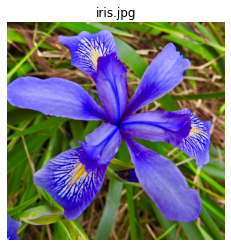

In [1]:
import numpy as np
import skimage as ski
from skimage import io

import matplotlib.pyplot as plt

# show versions
print(f'Available numpy:{np.__version__}\nskimage:{ski.__version__}')

def show_image(image, title='Image', cmap_type='gray', axis='off'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis(axis)

def read_image(img_name, 
               url_base='http://mustang.td.utfpr.edu.br/~faspanhol/DIP/img/'):
    return ski.io.imread(url_base + img_name)

img = read_image('iris.jpg')
show_image(img, 'iris.jpg')

1) **Carregue a imagem ``ara_macao_8b.jpg``. Exiba as dimensões da imagem original. Apresente as estatísticas (mínimo e máximo) das intensidades dos níveis de cinza. Apresente a imagem original e o respectivo histograma lado a lado.**

💡 **Dica: veja a documentação da função ``hist`` da ``matplotlib`` (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).**

Grayscale image dimensions: 800 x 556 pixels
Min intensity: 0
Max intensity: 255


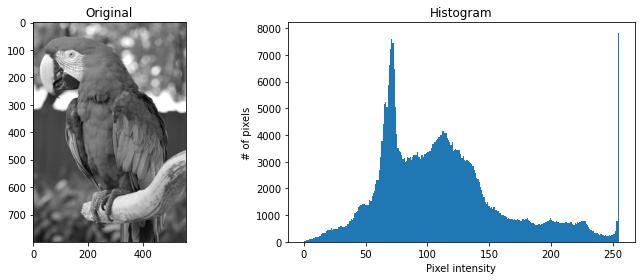

In [82]:
# insira sua resposta
ara_macao_8b = read_image('ara_macao_8b.jpg')
print(f"Grayscale image dimensions: {ara_macao_8b.shape[0]} x {ara_macao_8b.shape[1]} pixels")
print(f"Min intensity: {min(ara_macao_8b.ravel())}")
print(f"Max intensity: {max(ara_macao_8b.ravel())}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(ara_macao_8b, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].hist(ara_macao_8b.ravel(), 256, [0, 255])
ax[1].set_title("Histogram")
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('# of pixels')


fig.tight_layout()
plt.show()

2) **Carregue a imagem ``bird01.jpg``. Exiba as dimensões da imagem original. Converta para *grayscale*. Exiba as duas  imagens lado a lado.**

Original image dimensions: 679 x 575 pixels


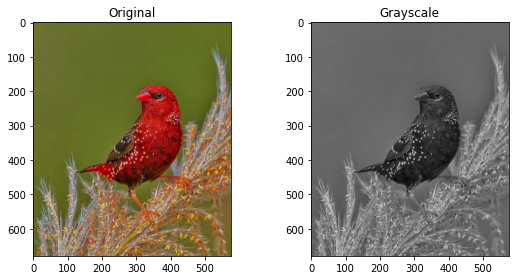

In [45]:
# insira sua resposta
bird01 = read_image('bird01.jpg')
print(f"Original image dimensions: {bird01.shape[0]} x {bird01.shape[1]} pixels")

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()


ax[0].imshow(bird01, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].imshow(ski.color.rgb2gray(bird01), cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

**Separe a imagem original nos três canais (*red*, *green* e *blue*). Apresente separadamente os três canais lado a lado e abaixo os respectivos histogramas. Utilize a função ``np.histogram`` para computar o histograma de cada canal. Exiba o pico de intensidade, i.e., os *bins*  que possuem maior frequência.**


💡 **Dica: Defina o tamanho (``figsize``) da figura final  em $12 \times 8$ polegas.**

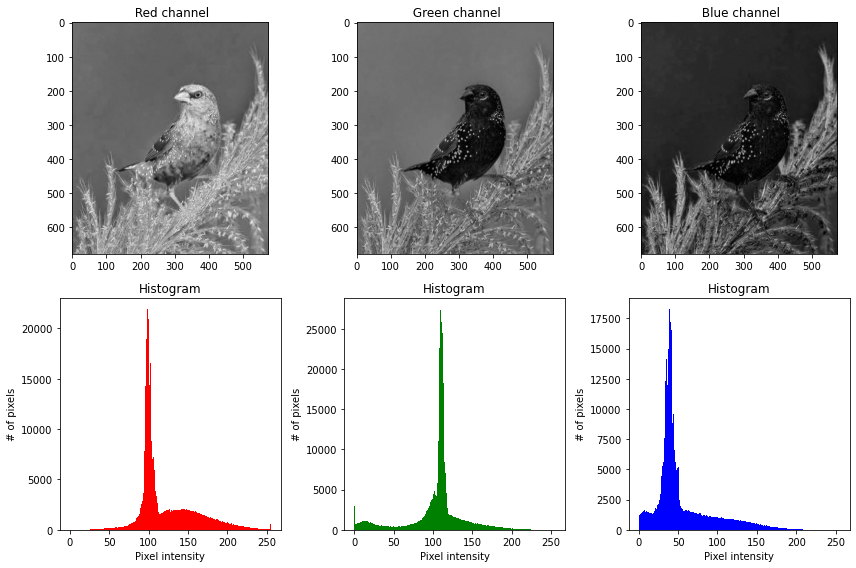

In [83]:
# insira sua resposta
import cv2
bird01 = read_image('bird01.jpg')

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax = axes.ravel()

colors = ("red", "green", "blue")


for channel_id, color in enumerate(colors):
    ax[channel_id].imshow(bird01[:, :, channel_id], cmap='gray')
    ax[channel_id].set_title(f" {color.capitalize()} channel")

    histogram, bin_edges = np.histogram(
        bird01[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax[channel_id + 3].hist(bird01[:, :, channel_id].ravel(),256,[0,255], color=color);
    ax[channel_id + 3].set_title("Histogram")
    ax[channel_id + 3].set_xlabel('Pixel intensity')
    ax[channel_id + 3].set_ylabel('# of pixels')




fig.tight_layout()
plt.show()

3) **Carregue a imagem ``obelix03_8b.png``. Exiba as dimensões da imagem original. Apresente as estatísticas (mínimo e máximo) das intensidades dos níveis de cinza. Apresente a imagem original e o respectivo histograma lado a lado.**


Grayscale image dimensions: 548 x 325 pixels
Min intensity: 0
Max intensity: 255


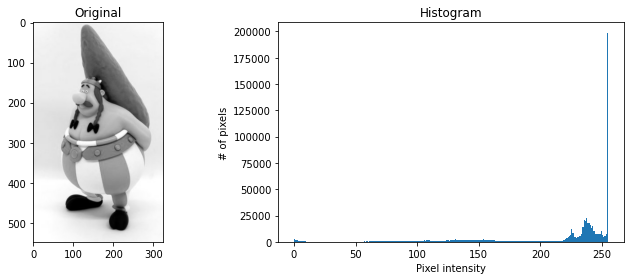

In [84]:
# insira sua resposta
obelix03_8b = read_image('obelix03_8b.png')
print(f"Grayscale image dimensions: {obelix03_8b.shape[0]} x {obelix03_8b.shape[1]} pixels")
print(f"Min intensity: {min(obelix03_8b.ravel())}")
print(f"Max intensity: {max(obelix03_8b.ravel())}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(obelix03_8b, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].hist(obelix03_8b.ravel(), 256, [0, 255])
ax[1].set_title("Histogram")
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('# of pixels')


fig.tight_layout()
plt.show()

**Carregue a imagem ``obelix03_8b_dark.png``. Exiba as dimensões da imagem original. Apresente as estatísticas (mínimo e máximo) das intensidades dos níveis de cinza. Apresente a imagem original e o respectivo histograma lado a lado.**

Grayscale image dimensions: 548 x 325 pixels
Min intensity: 0
Max intensity: 255


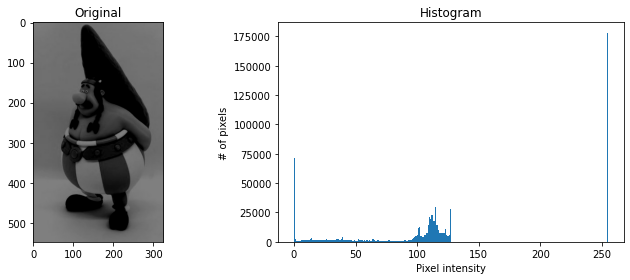

In [85]:
# insira sua resposta
obelix03_8b_dark = read_image('obelix03_8b_dark.png')
print(f"Grayscale image dimensions: {obelix03_8b_dark.shape[0]} x {obelix03_8b_dark.shape[1]} pixels")
print(f"Min intensity: {min(obelix03_8b_dark.ravel())}")
print(f"Max intensity: {max(obelix03_8b_dark.ravel())}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(obelix03_8b_dark, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].hist(obelix03_8b_dark.ravel(), 256, [0, 255])
ax[1].set_title("Histogram")
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('# of pixels')


fig.tight_layout()
plt.show()

Aplique a transformação gama dada por $s = cr^\gamma$, com $c=1$, para expandir os níveis de intensidade da imagem original. Procure valores de $\gamma$ que produzam um resultado visual semelhante ao mostrado. Apresente as estatísticas (mínimo e máximo) das intensidades dos níveis de cinza da imagem transformada. Apresente a imagem transformada e o respectivo histograma lado a lado.

💡 **Dica: utilize a função (``scale_range``) para escalonar as intensidades da imagem transformada na faixa $[0, 255]$. Converta a imagem transformada para valores inteiros antes de apresentar.**

Min intensity: 0
Max intensity: 255


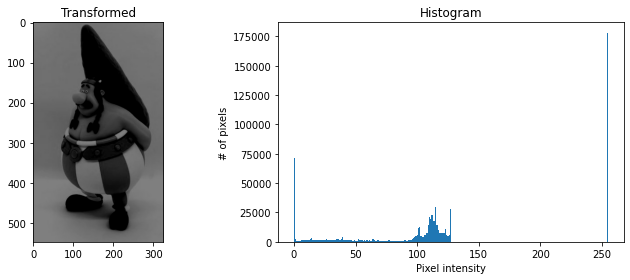

In [102]:
def scale_range (a, min:float, max:float):    
    a += -(np.min(a))
    a /= np.max(a) / (max - min)
    a += min
    return a

# insira sua resposta
obelix03_8b_dark = read_image('obelix03_8b_dark.png')

#Implementar aqui ainda
#s=crγ, com  c=1


print(f"Min intensity: {min(obelix03_8b_dark.ravel())}")
print(f"Max intensity: {max(obelix03_8b_dark.ravel())}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(obelix03_8b_dark, cmap=plt.cm.gray)
ax[0].set_title("Transformed")

ax[1].hist(obelix03_8b_dark.ravel(), 256, [0, 255])
ax[1].set_title("Histogram")
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('# of pixels')


fig.tight_layout()
plt.show()

4) **Carregue a imagem ``obelix03_8b_bright.png``. Essa imagem possui baixo contraste. Exiba as dimensões da imagem original. Apresente as estatísticas (mínimo e máximo) das intensidades dos níveis de cinza. Apresente a imagem original e o respectivo histograma lado a lado.**


Grayscale image dimensions: 548 x 325 pixels
Min intensity: 127
Max intensity: 255


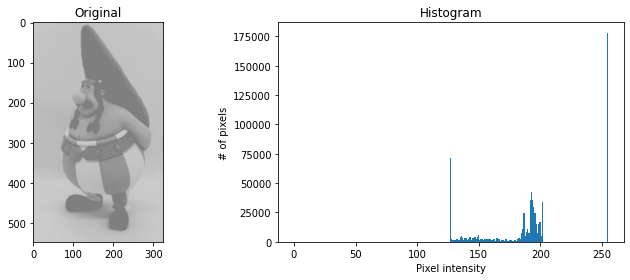

In [91]:
# insira sua resposta

obelix03_8b_bright = read_image('obelix03_8b_bright.png')

print(f"Grayscale image dimensions: {obelix03_8b_bright.shape[0]} x {obelix03_8b_bright.shape[1]} pixels")
print(f"Min intensity: {min(obelix03_8b_bright.ravel())}")
print(f"Max intensity: {max(obelix03_8b_bright.ravel())}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(obelix03_8b_bright, cmap=plt.cm.gray)
ax[0].set_title("Original")

ax[1].hist(obelix03_8b_bright.ravel(), 256, [0, 255])
ax[1].set_title("Histogram")
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('# of pixels')


fig.tight_layout()
plt.show()

Pesquise a função ``ski.exposure.rescale_intensity`` para alargar o contraste da imagem original. Utilize os percentils 5 e 95. Apresente a imagem transformada e o respectivo histograma.

Min intensity: 0
Max intensity: 255


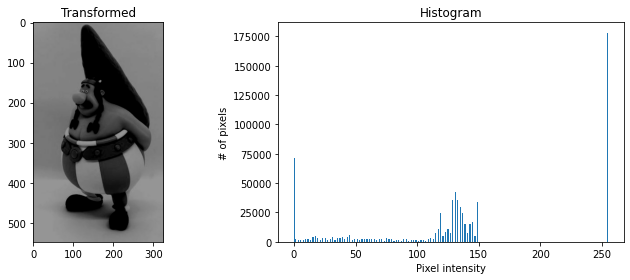

In [99]:
# insira sua resposta
# Contrast stretching

obelix03_8b_bright = read_image('obelix03_8b_bright.png')


obelix03_contrast=ski.exposure.rescale_intensity(obelix03_8b_bright)

print(f"Min intensity: {min(obelix03_contrast.ravel())}")
print(f"Max intensity: {max(obelix03_contrast.ravel())}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(obelix03_contrast, cmap=plt.cm.gray)
ax[0].set_title("Transformed")

ax[1].hist(obelix03_contrast.ravel(), 256, [0, 255])
ax[1].set_title("Histogram")
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('# of pixels')


fig.tight_layout()
plt.show()


Pesquise a função ``skimage.exposure.equalize_hist`` para equalizar o histograma da imagem original. Apresente a imagem transformada e o respectivo histograma.

Min intensity: 0.10010668163952835
Max intensity: 1.0


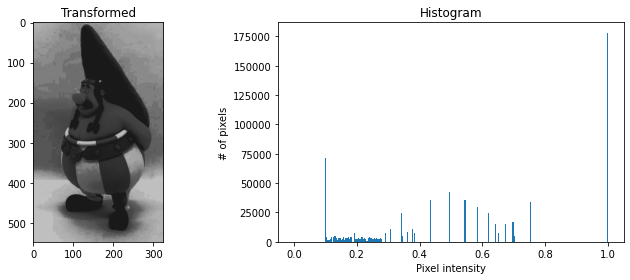

In [100]:
# insira sua resposta
# Equalization


obelix03_8b_bright = read_image('obelix03_8b_bright.png')
obelix03_equalization=ski.exposure.equalize_hist (obelix03_8b_bright)

print(f"Min intensity: {min(obelix03_equalization.ravel())}")
print(f"Max intensity: {max(obelix03_equalization.ravel())}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(obelix03_equalization, cmap=plt.cm.gray)
ax[0].set_title("Transformed")

ax[1].hist(obelix03_equalization.ravel(), 256, [0, 1])
ax[1].set_title("Histogram")
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('# of pixels')


fig.tight_layout()
plt.show()


**Pesquise a função ``skimage.exposure.equalize_adapthist`` que implementa o algoritmo *Contrast Limited Adaptive Histogram Equalization* (CLAHE). Utilize um limite de 0.02.**

Min intensity: 0.0
Max intensity: 1.0


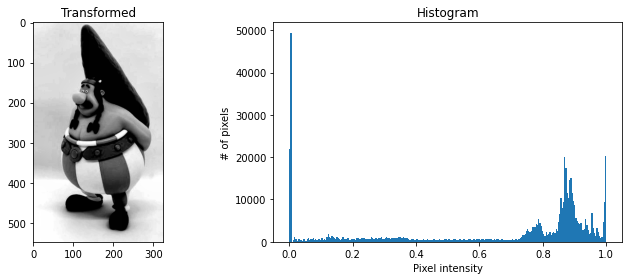

In [101]:
# insira sua resposta
# CLAHE

obelix03_8b_bright = read_image('obelix03_8b_bright.png')
obelix03_clahe=ski.exposure.equalize_adapthist(obelix03_8b_bright)

print(f"Min intensity: {min(obelix03_clahe.ravel())}")
print(f"Max intensity: {max(obelix03_clahe.ravel())}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(obelix03_clahe, cmap=plt.cm.gray)
ax[0].set_title("Transformed")

ax[1].hist(obelix03_clahe.ravel(), 256, [0, 1])
ax[1].set_title("Histogram")
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('# of pixels')


fig.tight_layout()
plt.show()


---
<font color="#ffb31a">Fabio Alexandre **SPANHOL**</font> <faspanhol@gmail.com>

<font color="#cccccc">*Updated: sep 08 2022*</font>